In [ ]:
#pip install pycausalimpact -there wasn't a conda package

In [3]:
import numpy as np
import pandas as pd
import statsmodels as sm
from statsmodels.tsa.statespace.structural import UnobservedComponents
from statsmodels.tsa.arima_process import ArmaProcess
from matplotlib import pyplot as plt
from causalimpact import CausalImpact

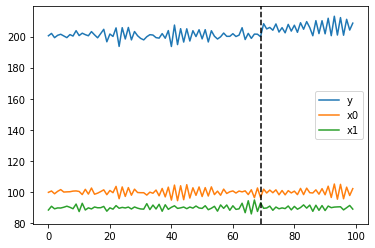

In [8]:
# This is an example presented in Google's R code.
np.random.seed(12345)
ar = np.r_[1, 0.9]
ma = np.array([1])
arma_process = ArmaProcess(ar, ma)

x0 = 100 + arma_process.generate_sample(nsample=100)
x1 = 90 + arma_process.generate_sample(nsample=100)
y = 1.2 * x0 + 0.9 * x1 + np.random.normal(size=100)

y[70:] += 5
data = pd.DataFrame({'x0': x0, 'x1': x1, 'y': y}, columns=['y', 'x0', 'x1'])
#note IMPORTANT first column must by the measured value (y), the rest contain covariates

data.plot()
plt.axvline(69, linestyle='--', color='k')
plt.legend();

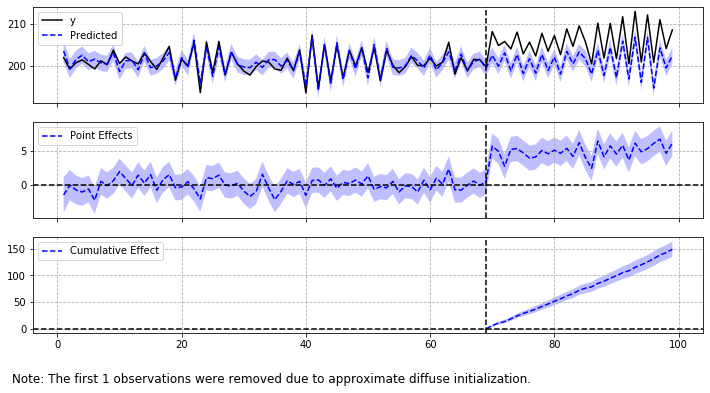

In [9]:
#this was on the example see cell below where they recommend setting prior_level_sd =None 
pre_period = [0, 69]
post_period = [70, 99]

ci = CausalImpact(data, pre_period, post_period)

ci.plot(figsize=(12, 6))


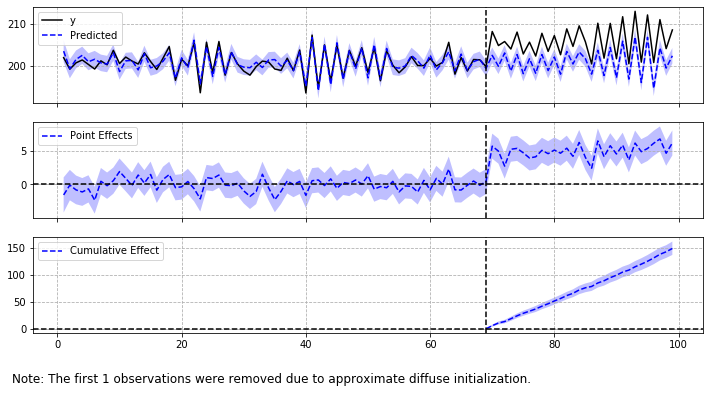

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    205.99             6179.57
Prediction (s.d.)         201.03 (0.21)      6031.0 (6.32)
95% CI                    [200.61, 201.43]   [6018.19, 6042.97]

Absolute effect (s.d.)    4.95 (0.21)        148.58 (6.32)
95% CI                    [4.55, 5.38]       [136.6, 161.38]

Relative effect (s.d.)    2.46% (0.1%)       2.46% (0.1%)
95% CI                    [2.26%, 2.68%]     [2.26%, 2.68%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))
Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 205.99. By contrast, in the absence of an
intervention, we would have expected an average response of 201.03.
The 95% interval of this counterfactual prediction is [200.61, 201.43].
Subtracting this prediction from the

In [10]:
pre_period = [0, 69]
post_period = [70, 99]

ci = CausalImpact(data, pre_period, post_period, prior_level_sd=None)
#https://pypi.org/project/pycausalimpact/ --they recommend setting none on
#default sd is 0.1

ci.plot(figsize=(12, 6))

print(ci.summary())

print(ci.summary(output='report'))



In [ ]:
ci.inferences.head()


# add dates - a bit more realistic 

In [6]:
dated_data = data.set_index(pd.date_range(start='20180101', periods=len(data)))

pre_period = ['20180101', '20180311']
post_period = ['20180312', '20180410']

dated_data.head()

,y,x0,x1
2018-01-01,200.472740,99.795292,88.434343
2018-01-02,201.989349,100.663180,90.846551
2018-01-03,199.254697,98.883699,89.205440
2018-01-04,200.768831,100.448941,89.786098
2018-01-05,201.444392,101.561734,89.709939


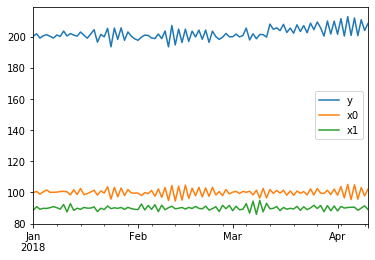

In [7]:
dated_data.plot()
plt.axvline(69, linestyle='--', color='k')
plt.legend();

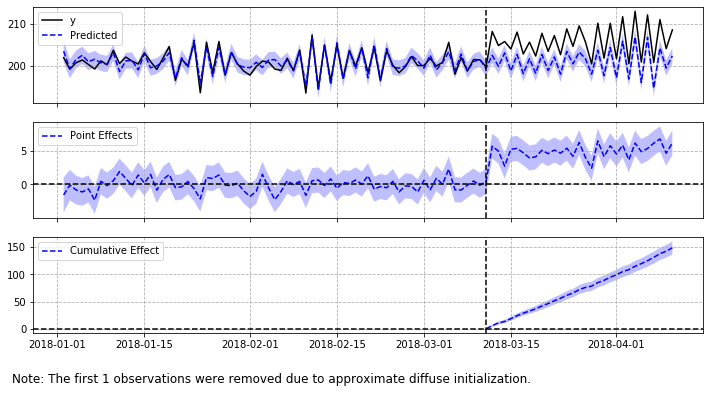

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 205.99. By contrast, in the absence of an
intervention, we would have expected an average response of 201.03.
The 95% interval of this counterfactual prediction is [200.65, 201.45].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 4.95 with a 95% interval of
[4.53, 5.34]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 6179.57.
By contrast, had the intervention not taken place, we would have expected
a sum of 6031.0. The 95% interval of this prediction is [6019.48, 6043.63].


The above results are given in terms of absolute numbers. In relative
terms, the response va

In [8]:
pre_period = ['20180101', '20180311']
post_period = ['20180312', '20180410']

ci = CausalImpact(dated_data, pre_period, post_period, prior_level_sd=None)

ci.plot(figsize=(12, 6))

print(ci.summary(output='report'))



# start playing with the data - remove the uplift and the boost 

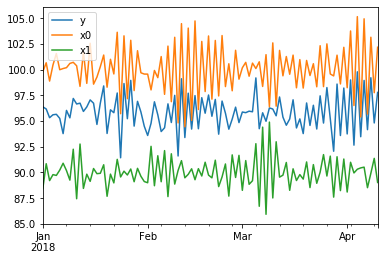

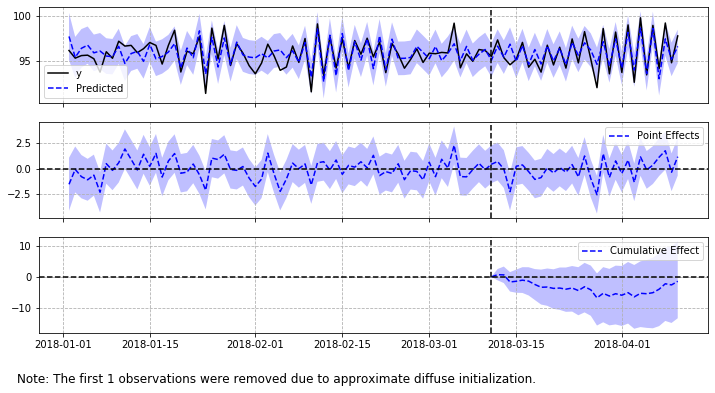

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 95.89. In the absence of an
intervention, we would have expected an average response of 95.94.
The 95% interval of this counterfactual prediction is [95.51, 96.33].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -0.05 with a 95% interval of
[-0.44, 0.38]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 2876.67.
Had the intervention not taken place, we would have expected
a sum of 2878.1. The 95% interval of this prediction is [2865.36, 2889.96].


The above results are given in terms of absolute numbers. In relative
terms, the response variable showed a decrease of 

In [14]:

#remove the boost 
np.random.seed(12345)
ar = np.r_[1, 0.9]
ma = np.array([1])
arma_process = ArmaProcess(ar, ma)

x0 = 100 + arma_process.generate_sample(nsample=100)
x1 = 90 + arma_process.generate_sample(nsample=100)
y = (0.6 * x0) + (0.4 * x1) + np.random.normal(size=100) #tg edited the boost

#y[70:] += 5

data = pd.DataFrame({'x0': x0, 'x1': x1, 'y': y}, columns=['y', 'x0', 'x1'])

data = data.set_index(pd.date_range(start='20180101', periods=len(data)))


data.plot()
plt.axvline(69, linestyle='--', color='k')
plt.legend()
plt.show()

pre_period = ['20180101', '20180311']
post_period = ['20180312', '20180410']

ci = CausalImpact(data, pre_period, post_period, prior_level_sd=None)

ci.plot(figsize=(12, 6))

print(ci.summary(output='report'))


# put the boost back in 

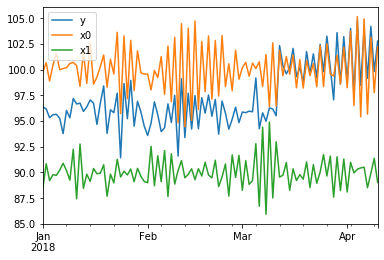

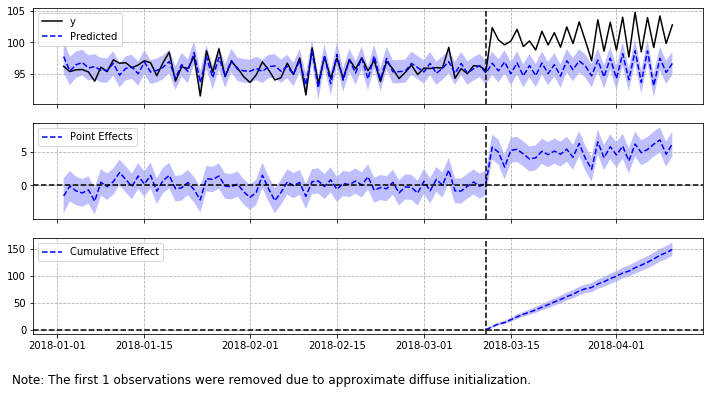

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 100.89. By contrast, in the absence of an
intervention, we would have expected an average response of 95.94.
The 95% interval of this counterfactual prediction is [95.51, 96.33].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 4.95 with a 95% interval of
[4.56, 5.38]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 3026.67.
By contrast, had the intervention not taken place, we would have expected
a sum of 2878.1. The 95% interval of this prediction is [2865.36, 2889.96].


The above results are given in terms of absolute numbers. In relative
terms, the response varia

In [15]:

#remove the boost 
np.random.seed(12345)
ar = np.r_[1, 0.9]
ma = np.array([1])
arma_process = ArmaProcess(ar, ma)

x0 = 100 + arma_process.generate_sample(nsample=100)
x1 = 90 + arma_process.generate_sample(nsample=100)
y = (0.6 * x0) + (0.4 * x1) + np.random.normal(size=100) #tg edited the boost

y[70:] += 5

data = pd.DataFrame({'x0': x0, 'x1': x1, 'y': y}, columns=['y', 'x0', 'x1'])

data = data.set_index(pd.date_range(start='20180101', periods=len(data)))


data.plot()
plt.axvline(69, linestyle='--', color='k')
plt.legend()
plt.show()

pre_period = ['20180101', '20180311']
post_period = ['20180312', '20180410']

ci = CausalImpact(data, pre_period, post_period, prior_level_sd=None)

ci.plot(figsize=(12, 6))

print(ci.summary(output='report'))

# put a random boost in 

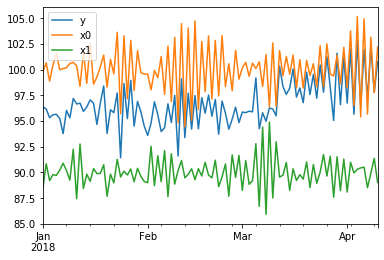

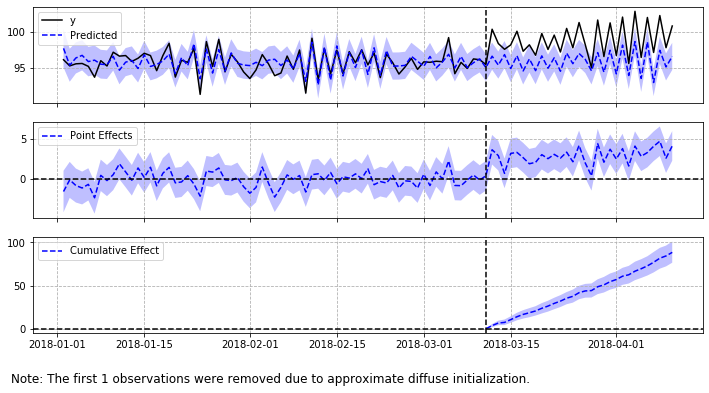

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 98.89. By contrast, in the absence of an
intervention, we would have expected an average response of 95.94.
The 95% interval of this counterfactual prediction is [95.52, 96.34].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 2.95 with a 95% interval of
[2.55, 3.37]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 2966.67.
By contrast, had the intervention not taken place, we would have expected
a sum of 2878.1. The 95% interval of this prediction is [2865.58, 2890.12].


The above results are given in terms of absolute numbers. In relative
terms, the response variab

In [59]:

#remove the boost 
np.random.seed(12345)
ar = np.r_[1, 0.9]
ma = np.array([1])
arma_process = ArmaProcess(ar, ma)

x0 = 100 + arma_process.generate_sample(nsample=100)
x1 = 90 + arma_process.generate_sample(nsample=100)
y = (0.6 * x0) + (0.4 * x1) + np.random.normal(size=100) #tg edited the boost


y[70:] = y[70:] + np.random.randint(2,10)

    
data = pd.DataFrame({'x0': x0, 'x1': x1, 'y': y}, columns=['y', 'x0', 'x1'])
data = data.set_index(pd.date_range(start='20180101', periods=len(data)))


data.plot()
plt.axvline(69, linestyle='--', color='k')
plt.legend()
plt.show()



pre_period = ['20180101', '20180311']
post_period = ['20180312', '20180410']

ci = CausalImpact(data, pre_period, post_period, prior_level_sd=None)

ci.plot(figsize=(12, 6))

print(ci.summary(output='report'))



# add more varibles and mess with it more. 

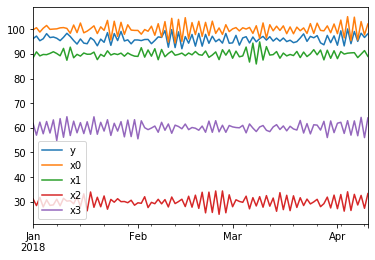

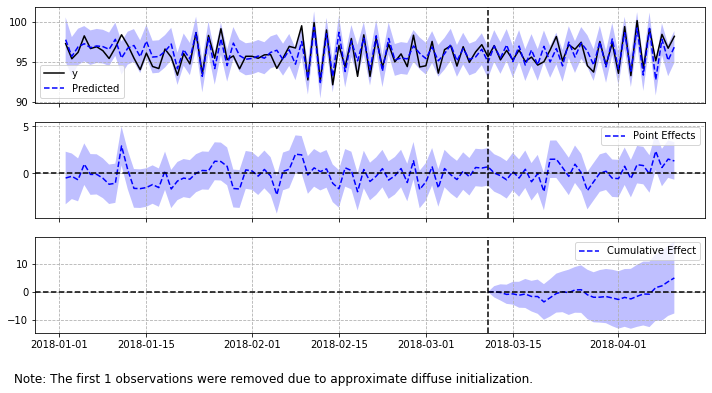

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 96.24. In the absence of an
intervention, we would have expected an average response of 96.07.
The 95% interval of this counterfactual prediction is [95.63, 96.49].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 0.17 with a 95% interval of
[-0.26, 0.6]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 2887.1.
Had the intervention not taken place, we would have expected
a sum of 2882.08. The 95% interval of this prediction is [2869.04, 2894.82].


The above results are given in terms of absolute numbers. In relative
terms, the response variable showed an increase of +

In [64]:

#remove the boost 
np.random.seed(12345)
ar = np.r_[1, 0.9]
ma = np.array([1])
arma_process = ArmaProcess(ar, ma)

x0 = 100 + arma_process.generate_sample(nsample=100)
x1 = 90 + arma_process.generate_sample(nsample=100)
x2 = 30 + arma_process.generate_sample(nsample=100)
x3 = 60 + arma_process.generate_sample(nsample=100)
y = (0.6 * x0) + (0.4 * x1) + np.random.normal(size=100) #tg edited the boost


y[70:] = y[70:] + np.random.randint(0,4)

    
data = pd.DataFrame({'x0': x0, 'x1': x1,'x2':x2,'x3':x3, 'y': y}, columns=['y', 'x0', 'x1','x2','x3'])
data = data.set_index(pd.date_range(start='20180101', periods=len(data)))


data.plot()
plt.axvline(69, linestyle='--', color='k')
plt.legend()
plt.show()



pre_period = ['20180101', '20180311']
post_period = ['20180312', '20180410']

ci = CausalImpact(data, pre_period, post_period, prior_level_sd=None)

ci.plot(figsize=(12, 6))

print(ci.summary(output='report'))






In [65]:
CausalImpact?